In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

In [4]:
def UpdateS(s, a, actions_dict):
  s_prim = np.empty(2, dtype = 'int')
  s_prim[0] = s[0] + actions_dict[a][0]
  s_prim[1] = s[1] + actions_dict[a][1]
  if s_prim[0] == -1:
    s_prim[0] = 0
  elif s_prim[0] == 15:
    s_prim[0] = 14
  elif s_prim[1] == -1:
    s_prim[1] = 0
  elif s_prim[1] == 15:
    s_prim[1] = 14
  return s_prim

In [5]:
def SelectAction(Q, s_prim):
  q = np.empty(4, dtype = 'float')
  for i in range(4):
    q[i] = Q[s_prim[0]][s_prim[1]][i]
  b = min(q)
  q -= b*np.ones(4)
  P = np.exp(q) / sum(np.exp(q))
  action = np.argmax(P)
  a = np.random.choice([action, 4], p = [0.95, 0.05])
  temp = []
  tmp = []
  if a != action:
    for i in range(4):
      if i != action:
        temp.append(i)
        tmp.append(q[i])
    if sum(np.exp(tmp)) != 0:
      tmp = np.exp(tmp) / sum(np.exp(tmp))
      action = np.random.choice(temp, p = tmp)
    else:
      action = temp[tmp.index(max(tmp))]
  return action

In [21]:
def UpdateQ(alpha, gama, Q, s, a, r, actions_dict, s_prim, flag, flag_count):
  q = max(Q[s_prim[0]][s_prim[1]].values())
  help = Q[s[0]][s[1]][a]
  if flag:
    if r == 30:
      if flag_count[s_prim[0]][s_prim[1]]:
        r -= 45
      else:
        r -= 35
    else:
      r -= 25
  if s[0] == s_prim[0] and s[1] == s_prim[1]:
    r -= 25
  Q[s[0]][s[1]][a] = (1 - alpha) * Q[s[0]][s[1]][a] + alpha * (r + gama * q)
  return Q

In [9]:
def OptimizePolicy(Q_dict, reward_table, actions_dict):
  visited_cells = np.zeros((15, 15))
  gama = 0.9
  reward = np.zeros(3000)
  alpha = 1
  for i in range(3000):
    flag_count = np.zeros((15, 15))
    count = np.zeros((15, 15))
    if i % 3 == 0:
      s = [0, 0]
    else:
      s = random.randint((15, 15))
    a = SelectAction(Q_dict, s)
    alpha *= 0.99
    if alpha < 0.2:
      alpha = 0.2
    visited_cells[s[0]][s[1]] = 1
    while s[0] != 8 or s[1] != 14:
      flag = 0
      s_prim = UpdateS(s, a, actions_dict)
      if visited_cells[s_prim[0]][s_prim[1]]:
        count[s_prim[0]][s_prim[1]] += 1
        if count[s_prim[0]][s_prim[1]] > 20000 and count[s[0]][s[1]] < 20001:
          flag_count[s_prim[0]][s_prim[1]] = 1
        flag = 1
      else:
        visited_cells[s_prim[0]][s_prim[1]] = 1
      Q_dict = UpdateQ(alpha, gama, Q_dict, s, a, reward_table[s_prim[0]][s_prim[1]], actions_dict, s_prim, flag, flag_count)
      reward[i] += reward_table[s_prim[0]][s_prim[1]]
      s = s_prim
      a = SelectAction(Q_dict, s)
  return Q_dict, reward

In [10]:
def CreateQDict():
  Q_dict = [[]]
  for i in range(n):
    Q_dict.append([])
    for j in range(n):
      Q_dict[i].append({0: 0, 1: 0, 2: 0, 3: 0})
  return Q_dict

In [25]:
def Train(R2, reward_table, actions_dict):
  Q_dict = CreateQDict()
  Q_dict, reward = OptimizePolicy(Q_dict, reward_table, actions_dict)
  plt.title("R2 = 0") 
  plt.xlabel("epoch") 
  plt.ylabel("Reward") 
  plt.plot(np.array(range(200, 3000)), reward[200:3000]) 
  plt.show()
  return Q_dict

In [13]:
def Test(Q_dict, s, actions_dict, reward_table):
  reward = 0
  while s[0] != 8 or s[1] != 14:
    print(s)
    a = SelectAction(Q_dict, s)
    s = UpdateS(s, a, actions_dict)
    reward += reward_table[s[0]][s[1]]
  print(s)
  print(reward)

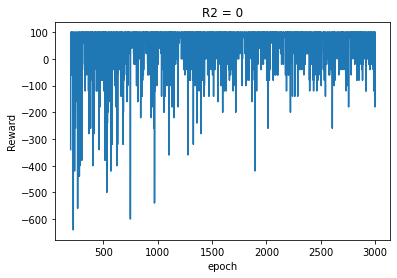

[0, 0]
[1 0]
[1 1]
[1 2]
[1 3]
[1 4]
[1 5]
[1 6]
[1 7]
[1 8]
[1 9]
[ 1 10]
[ 1 11]
[ 1 12]
[ 1 13]
[ 1 14]
[ 2 14]
[ 3 14]
[ 4 14]
[ 5 14]
[ 6 14]
[ 7 14]
[ 8 14]
99.79


In [26]:
n = 15
R2 = 0
actions_dict = {0: [-1, 0], 1: [1, 0], 2: [0, 1], 3: [0, -1]}
costs = {'0': -0.01, '1':-0.01, '2': -20, '3': 100, '4': R2, '5': -100}
reward_table = np.zeros((n, n))
input_file = open('/content/drive/My Drive/Test/HW5/ENV.txt', 'r') 
Lines = input_file.readlines()
row = 0
maze = []
for line in Lines:
  maze.append([])
  for i in range(n):
    maze[row].append(line[2*i])
    reward_table[row][i] = costs[line[2*i]]
  row += 1

Q_dict = Train(R2, reward_table, actions_dict)
s = [0, 0]
Test(Q_dict, s, actions_dict, reward_table)

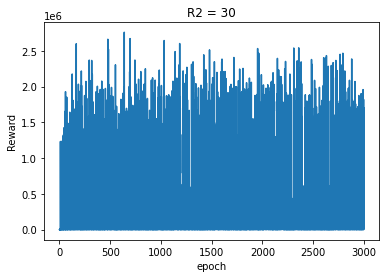

[0, 0]
[0 1]
[1 1]
[2 1]
[3 1]
[3 0]
[4 0]
[5 0]
[5 1]
[6 1]
[7 1]
[8 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[6 0]
[6 1]
[7 1]
[6 1]
[6 0]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[8 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[6 0]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[6 0]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[6 0]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[8 1]
[7 1]
[6 1]
[7 1]
[6 1]
[7 1]
[6 1]
[6 0]
[6 1]
[7 1]
[6 1]
[7 1]
[8 1]
[7 1]
[6 1]
[7 1]
[6 1]
[6 0]
[6 1]
[7 1]
[6 1]
[7 

In [23]:
n = 15
R2 = 30
actions_dict = {0: [-1, 0], 1: [1, 0], 2: [0, 1], 3: [0, -1]}
costs = {'0': -0.01, '1':-0.01, '2': -20, '3': 100, '4': R2, '5': -100}
reward_table = np.zeros((n, n))
input_file = open('/content/drive/My Drive/Test/HW5/ENV.txt', 'r') 
Lines = input_file.readlines()
row = 0
maze = []
for line in Lines:
  maze.append([])
  for i in range(n):
    maze[row].append(line[2*i])
    reward_table[row][i] = costs[line[2*i]]
  row += 1

Q_dict = Train(R2, reward_table, actions_dict)
s = [0, 0]
Test(Q_dict, s, actions_dict, reward_table)